<a href="https://colab.research.google.com/github/Malu2203/Topic-modelling-on-BBC-news-article/blob/main/Topic_modelling_on_BBC_news_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME: TOPIC MODELLING ON BBC NEWS ARTICLE**

*** ***
*  ##### **Project Type**    - Unsupervised
*  ##### **Contribution**    - Team
*  ##### **Team Member 1 -** Soumyadip Paul 
*  ##### **Team Member 2 -** Aishwarya K P
*  ##### **Team Member 3 -** Akshat Raj Kumawat


*******
* # **Github LINK-**

* https://github.com/Malu2203/Topic-modelling-on-BBC-news-article.git


# **PROJECT SUMMARY:**

Enter contributions here

# **PROBLEM DESCRIPTION:**

BBC stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month.

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.

In this project the task is to identify major themes/topics across a collection of BBC news articles.

# **BUSINESS CONTEXT:**
* The BBC is one of the world's largest and most respected news organizations, providing news, information, and analysis to a global audience. However, with a vast amount of news articles published every day, it can be challenging for readers to quickly and efficiently find articles on specific topics of interest.
* To address this issue we can create a machine learning (ML) model that can automatically identify the topics of each article and categorize them accordingly. This model would be trained on a vast corpus of BBC news articles and use advanced natural language processing (NLP) techniques to extract key topics and themes from the text.
* This would enhance the user experience, making it easier for readers to find relevant articles and stay up-to-date on the latest news in their areas of interest.
* Additionally, the topic model could be used internally by the BBC's editorial team to assist with content curation and to identify emerging trends and themes in the news. This would help the BBC to provide more timely and relevant coverage of the topics that matter most to its audience.

*Data-Set used from the publication: - D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.*

# **DATA PREPARATION:**

In [7]:
# mounting the drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

*The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.*

In [9]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/AlmaBetter/MODULE4/capstone project/Unsupervised ML/bbc'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

*The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. There are over 2000 news article available in these categories.*

In [10]:
bbc.sample(10)

,Filename,Contents,Category
547,029,baghdad blogger on big screen a film based on...,entertainment
880,357,aviator and vera take bafta glory hollywood b...,entertainment
490,471,tsunami slows sri lanka's growth sri lanka's ...,business
1026,118,bid to cut court witness stress new targets t...,politics
2182,330,eu software patent law faces axe the european...,tech
1164,259,'poll idols' face first hurdles vote for me -...,politics
1877,071,games enter the classroom video games could s...,tech
1008,098,ministers deny care sums 'wrong' ministers ha...,politics
607,120,'my memories of marley...' to mark the 60th a...,entertainment
777,283,prodigy join v festival line-up essex act pro...,entertainment


##### **The dataset consists of 4 columns:**

* *Index : Entry number*
* *Filname : Destination File Name/ Number*
* *Contents : Complete transcript of the article, the complete textual data*
* *Category : Article topic*

In [11]:
bbc.shape

(2224, 3)

*Let's check for duplicates cause having duplicates will result in inconsistencies*

In [12]:
bbc.duplicated(subset = ['Contents']).sum()

99

In [13]:
bbc.drop_duplicates(subset = ['Contents'],inplace = True)
bbc

,Filename,Contents,Category
0,003,yukos unit buyer faces loan claim the owners ...,business
1,001,ad sales boost time warner profit quarterly p...,business
2,002,dollar gains on greenspan speech the dollar h...,business
3,024,us trade gap hits record in 2004 the gap betw...,business
4,004,high fuel prices hit ba's profits british air...,business
...,...,...,...
2218,368,net fingerprints combat attacks eighty large ...,tech
2219,397,bt program to beat dialler scams bt is introd...,tech
2220,362,bad e-mail habits sustains spam the 'bad beha...,tech
2221,369,microsoft plans 'safer id' system microsoft i...,tech


# **DATA WRANGLING AND VISUALIZATION:**

*Let's add a column which shows us the number of words used in each article*

In [14]:
bbc['Contents_len'] = bbc['Contents'].str.len()

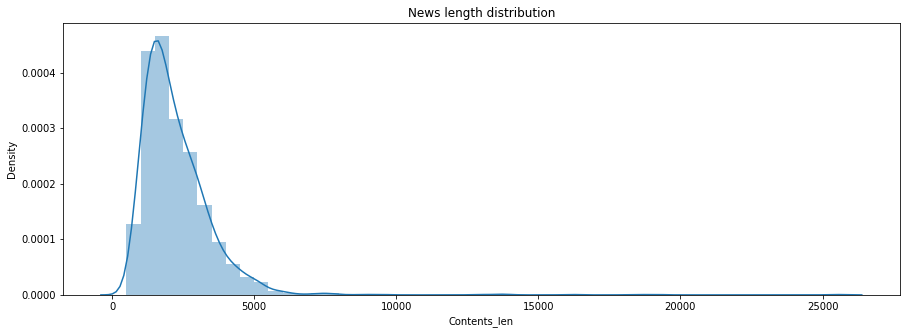

In [15]:
plt.figure(figsize=(15, 5))
sns.distplot(bbc['Contents_len']).set_title('News length distribution');

In [16]:
bbc

,Filename,Contents,Category,Contents_len
0,003,yukos unit buyer faces loan claim the owners ...,business,1551
1,001,ad sales boost time warner profit quarterly p...,business,2559
2,002,dollar gains on greenspan speech the dollar h...,business,2252
3,024,us trade gap hits record in 2004 the gap betw...,business,1952
4,004,high fuel prices hit ba's profits british air...,business,2401
...,...,...,...,...
2218,368,net fingerprints combat attacks eighty large ...,tech,2791
2219,397,bt program to beat dialler scams bt is introd...,tech,2518
2220,362,bad e-mail habits sustains spam the 'bad beha...,tech,2849
2221,369,microsoft plans 'safer id' system microsoft i...,tech,2324


*Checking the number of Article per categories:* 

In [17]:
cat_count =bbc.groupby(['Category'],)['Category'].count()

Text(0.5, 1.0, 'Count per Category')

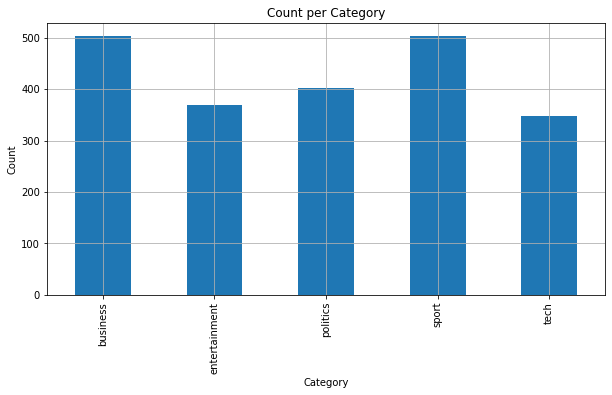

In [18]:
plt.figure(figsize=(10,5))
cat_count.plot(kind ='bar', grid =True)
plt.ylabel("Count")
plt.title("Count per Category")

##### **Let's Check the textual content of the Data:**

In [19]:
content = bbc.reset_index()
content = content['Contents']
content

0       yukos unit buyer faces loan claim  the owners ...
1       ad sales boost time warner profit  quarterly p...
2       dollar gains on greenspan speech  the dollar h...
3       us trade gap hits record in 2004  the gap betw...
4       high fuel prices hit ba's profits  british air...
                              ...                        
2120    net fingerprints combat attacks  eighty large ...
2121    bt program to beat dialler scams  bt is introd...
2122    bad e-mail habits sustains spam  the 'bad beha...
2123    microsoft plans 'safer id' system  microsoft i...
2124    beckham virus spotted on the net  virus writer...
Name: Contents, Length: 2125, dtype: object

*Removing the punctuations from our corpuses*

In [20]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [21]:
bbc['Contents'] = bbc['Contents'].apply(remove_punctuation)
bbc.head(10)

,Filename,Contents,Category,Contents_len
0,003,yukos unit buyer faces loan claim the owners ...,business,1551
1,001,ad sales boost time warner profit quarterly p...,business,2559
2,002,dollar gains on greenspan speech the dollar h...,business,2252
3,024,us trade gap hits record in 2004 the gap betw...,business,1952
4,004,high fuel prices hit bas profits british airw...,business,2401
5,019,india widens access to telecoms india has rai...,business,1732
6,025,yukos loses us bankruptcy battle a judge has ...,business,2703
7,011,ask jeeves tips online ad revival ask jeeves ...,business,1143
8,012,indonesians face fuel price rise indonesias g...,business,1846
9,014,telegraph newspapers axe 90 jobs the daily an...,business,2980


* **CountVectorizer(Top Words):**
 
In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization.**

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. *This process is called Feature Extraction (or Vectorization).*

In [22]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

*Removing stopword using NLTK:*

In [23]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# extracting all stopwords for english language
stop = nltk.corpus.stopwords.words('english')
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


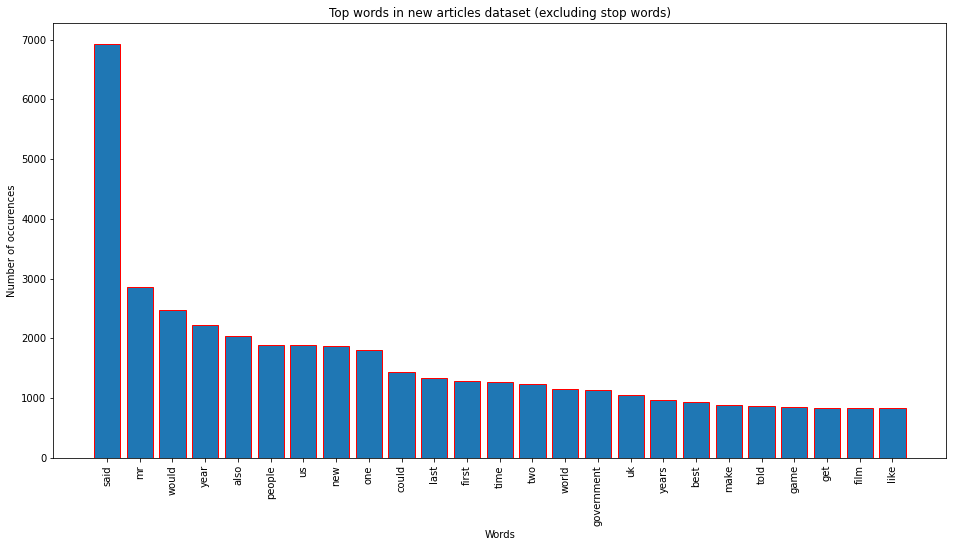

In [25]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stop)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=content)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, edgecolor='red')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
plt.show()

Let's Create wordclouds for different topics:

In [26]:
from wordcloud import WordCloud ,STOPWORDS
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

#### **BUSINESS:**

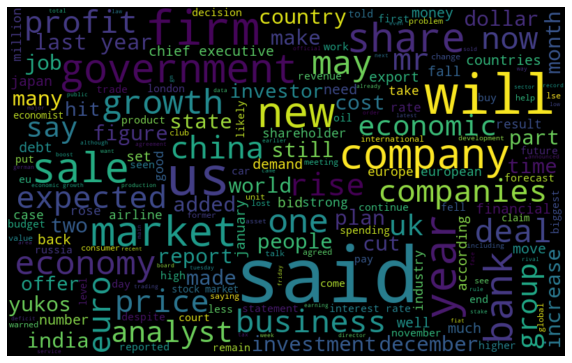

In [27]:
subset=bbc[bbc.Category=="business"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **ENTERTAINMENT:**

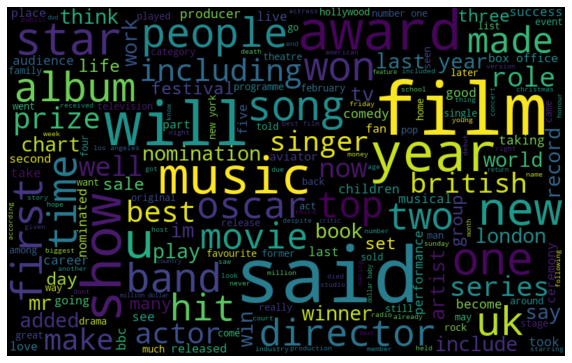

In [28]:
subset=bbc[bbc.Category=="entertainment"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **POLITICS:**

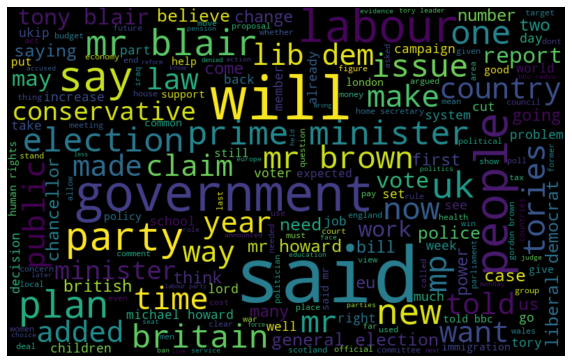

In [29]:
subset=bbc[bbc.Category=="politics"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **SPORTS:**


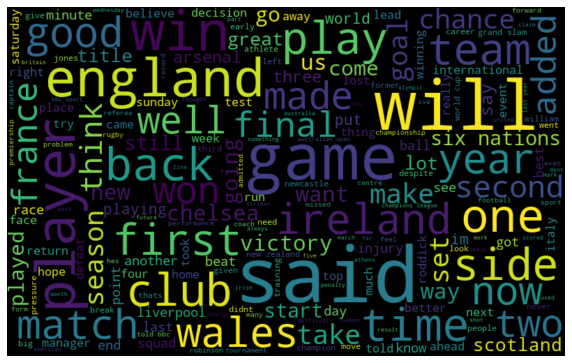

In [30]:
subset=bbc[bbc.Category=="sport"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **TECHNOLOGY:**

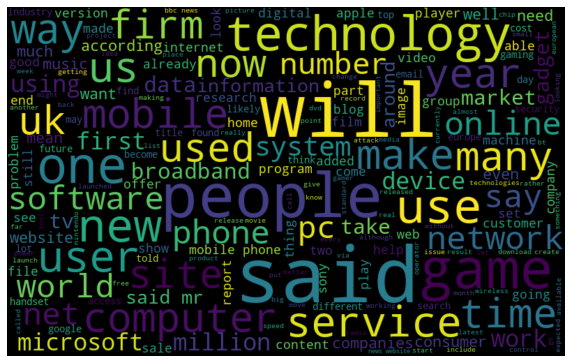

In [31]:
subset=bbc[bbc.Category=="tech"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)


##### *STEMMING AND LEMMATIZING THE DATA*
* *Stemming:* is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

* *Lemmatization:* This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [32]:
content

0       yukos unit buyer faces loan claim  the owners ...
1       ad sales boost time warner profit  quarterly p...
2       dollar gains on greenspan speech  the dollar h...
3       us trade gap hits record in 2004  the gap betw...
4       high fuel prices hit ba's profits  british air...
                              ...                        
2120    net fingerprints combat attacks  eighty large ...
2121    bt program to beat dialler scams  bt is introd...
2122    bad e-mail habits sustains spam  the 'bad beha...
2123    microsoft plans 'safer id' system  microsoft i...
2124    beckham virus spotted on the net  virus writer...
Name: Contents, Length: 2125, dtype: object

In [33]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### **Vectorization:**


*Vectorization is a technique that converts the text content to numerical feature vectors. Bag of Words takes a document from a corpus and converts it into a numeric vector by mapping each document word to a feature vector for the machine learning model.*

In [34]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stop, max_features = 4000)

# text before vectorization 
text_sample = content
print('Content after removing Stopwords and Punctuations: \n{}'.format(text_sample[23]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Vectorization: \n{}'.format(document_term_matrix[23]))
     

Content after removing Stopwords and Punctuations: 
jobs growth still slow in the us  the us created fewer jobs than expected in january, but a fall in jobseekers pushed the unemployment rate to its lowest level in three years.  according to labor department figures, us firms added only 146,000 jobs in january. the gain in non-farm payrolls was below market expectations of 190,000 new jobs. nevertheless it was enough to push down the unemployment rate to 5.2%, its lowest level since september 2001. the job gains mean that president bush can celebrate - albeit by a very fine margin - a net growth in jobs in the us economy in his first term in office. he presided over a net fall in jobs up to last november's presidential election - the first president to do so since herbert hoover. as a result, job creation became a key issue in last year's election. however, when adding december and january's figures, the administration's first term jobs record ended in positive territory.  the labor de

# **MODEL IMPLEMENTATION:**

## **Latent Dirichlet Allocation (LDA):**

---

Latent Dirichlet Allocation (LDA) algorithm is an unsupervised learning algorithm that attempts to describe a set of observations as a mixture of distinct categories. LDA is most commonly used to discover a user-specified number of topics shared by documents within a text corpus.

An advantage of the LDA technique is that one does not have to know in advance what the topics will look like. By tuning the LDA parameters to fit different dataset shapes, one can explore topic formation and resulting document clusters.

The goal of LDA is to map all the documents to the topics in a way, such that the words in each document are mostly captured by those imaginary topics.


* Will be using Latent Dirichlet Allocation for checking the latent features(topics) of our corpus
* We will be using pyLDAvis which allows a better visualization

* We will be using T-Sne for lowering down the dimensions of our feature-space
* We will tuning the hyper-parameters of LDA using RandomizedSearchCV

In [35]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -648777.4585783412
LDA model Perplexity on train data 1592.568561533978


In [36]:
# installing pyLDAvis to visualize the results of LDA model
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.7 MB/s eta 0:00:00


In [37]:
# importing pyLDAvis module
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [38]:
# generate and display the graph
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      128.700882 -147.657867       1        1  24.206182
0      -53.301537   88.223785       2        1  21.790682
3       78.301659    1.770225       3        1  21.572727
4     -127.970284  -57.003437       4        1  17.921336
2      -30.930252 -180.517456       5        1  14.509072, topic_info=            Term         Freq        Total Category  logprob  loglift
2377          mr  2841.000000  2841.000000  Default  30.0000  30.0000
1453        film   824.000000   824.000000  Default  29.0000  29.0000
2049      labour   768.000000   768.000000  Default  28.0000  28.0000
1640  government  1129.000000  1129.000000  Default  27.0000  27.0000
1239    election   620.000000   620.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1474       first   215.206141  1278.943464   Topic5  -5.5509   0.1482
2424         new   222.630197  1858.298400   Topic5  -5.5170  -0.1915
2671     players   172.818078   473.123304   Topic5  -5.7703   0.9233
3987       years   178.168050   958.663661   Topic5  -5.7398   0.2476
2133        like   176.512306   824.235225   Topic5  -5.7491   0.3893

[396 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.254881      000
0         2  0.390996      000
0         3  0.266891      000
0         4  0.049375      000
0         5  0.036030      000
...     ...       ...      ...
3987      5  0.185675    years
3995      2  0.994808  yugansk
3997      2  0.996581    yukos
3998      2  0.020140  zealand
3998      4  0.966734  zealand

[796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

In [39]:
# creating docterms dataframe
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)
     
# display docterms df
docterms 

,Topic,Freq,Term
term,,,
3791,3,0.998579,users
2334,3,0.998516,mobile
2123,1,0.998224,liberal
2122,1,0.998224,lib
2643,3,0.998025,phones
...,...,...,...
2488,2,0.002147,old
3735,1,0.002032,tv
1640,3,0.000886,government


In [40]:
# create topics dataframe
topicsdf = pd.DataFrame()
     

# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)
topicsdf

,Topic,Terms
0,1.0,"[liberal, lib, parliament, immigration, tory, ..."
1,2.0,"[shares, yukos, investors, rosneft, oil, yugan..."
2,3.0,"[users, mobile, phones, digital, devices, soft..."
3,4.0,"[actor, actress, festival, seed, oscar, theatr..."
4,5.0,"[chelsea, ferguson, gerrard, arsenal, glazer, ..."


### **TOPIC 1 : POLITICS**

In [41]:
# creating term freq dict for topic 1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'liberal': 0.9982239904024677,
 'lib': 0.998223937358719,
 'parliament': 0.997504537972264,
 'immigration': 0.9968983790646773,
 'tory': 0.996441761368777,
 'commons': 0.995913608095627,
 'tories': 0.9957181931782582,
 'lords': 0.9954240821813035,
 'mp': 0.9950367910930581,
 'conservatives': 0.9950367819060544,
 'blunkett': 0.9946127969426108,
 'dems': 0.9939473706336147,
 'asylum': 0.9939473512017071,
 'mps': 0.9939145289255538,
 'politics': 0.993845173778166,
 'terror': 0.9929409194409509,
 'straw': 0.9924274405188884,
 'election': 0.9912004806023011,
 'dem': 0.9907227865332887,
 'blair': 0.98648378597914,
 'suspects': 0.986209574427233,
 'assembly': 0.9852017915212291,
 'manifesto': 0.9848391476470125,
 'constitution': 0.9840719503175256,
 'labour': 0.9833426762335702,
 'poster': 0.982798554000709,
 'campaigning': 0.9823368346227022,
 'muslim': 0.9818560711273664,
 'westminster': 0.9808234242568282,
 'hunting': 0.9796779278721736,
 'party': 0.977533130378471,
 'conservative': 0.975

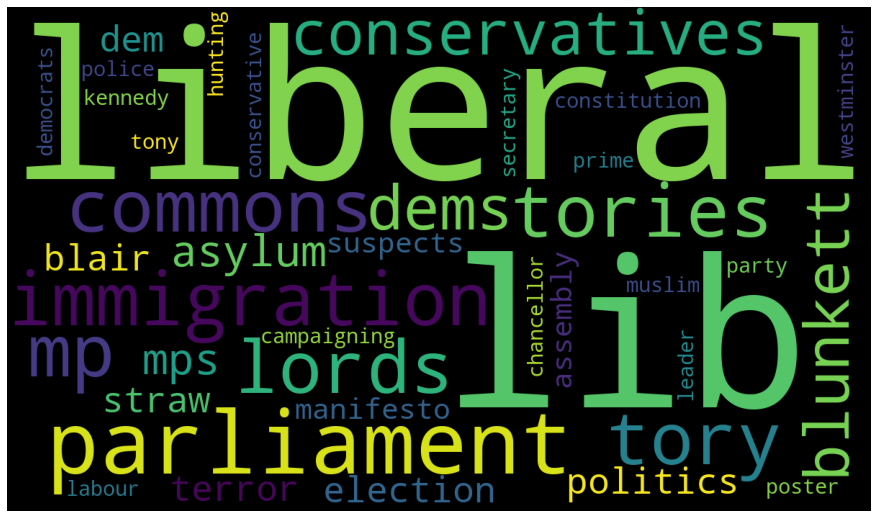

In [42]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 2: SPORTS**

In [43]:
# creating term freq dict for topic 2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'shares': 0.9969670031080851,
 'yukos': 0.9965812974215952,
 'investors': 0.9959931442052318,
 'rosneft': 0.9950842571847438,
 'oil': 0.9949783822954006,
 'yugansk': 0.9948075576777967,
 'currency': 0.9948075542841815,
 'imf': 0.9945213678434145,
 '8bn': 0.9945212797821017,
 'securities': 0.9939191595036264,
 '2bn': 0.9939188832360482,
 'debt': 0.9925755424526767,
 'boeing': 0.9918289871022812,
 'exports': 0.9916426371043467,
 'bankruptcy': 0.991642627411823,
 'crude': 0.9910185380248019,
 'bank': 0.9900764646476627,
 'shareholders': 0.9896817749585595,
 'inflation': 0.988416006135139,
 'gm': 0.9872958911240358,
 'lse': 0.9863812711513984,
 'gazprom': 0.9846942875296535,
 'fiat': 0.983954786137474,
 'airlines': 0.9839546572782365,
 'gas': 0.9835697976286879,
 'economist': 0.9835695077015866,
 'wage': 0.9827662551876015,
 'boerse': 0.9819157529711732,
 '5bn': 0.9810355621966411,
 'worldcom': 0.9810135292247427,
 'ebbers': 0.9800548230649611,
 'fuel': 0.9776363204218104,
 'stock': 0.977

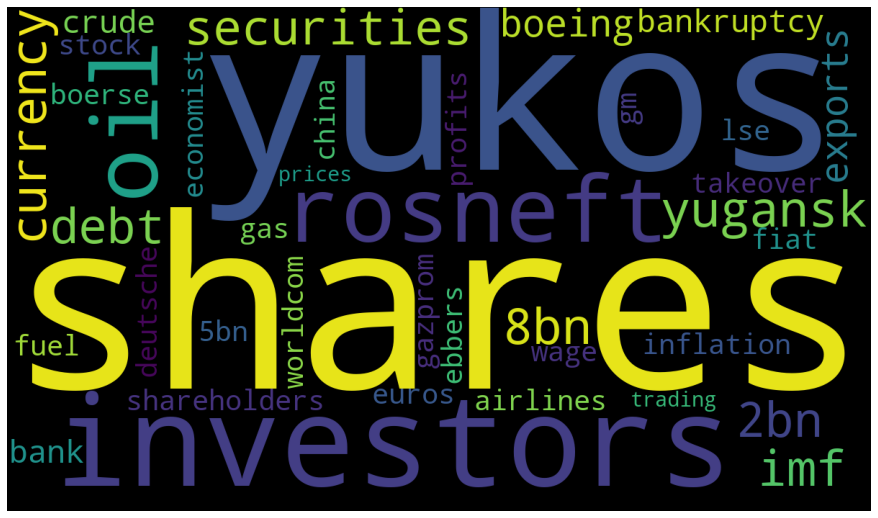

In [44]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 3: BUSINESS**

In [45]:
# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict

{'users': 0.9985787153833022,
 'mobile': 0.9985162154125631,
 'phones': 0.9980253748442031,
 'digital': 0.9978074433983307,
 'devices': 0.9975679675206608,
 'software': 0.9965312860386688,
 'kilroy': 0.9964420558702618,
 'bt': 0.9963085505886825,
 'broadband': 0.9959703168691623,
 'microsoft': 0.9957546935146137,
 'networks': 0.9956535084239504,
 'google': 0.9955981724406205,
 'silk': 0.9952954009967,
 'apple': 0.9952519688206591,
 'pc': 0.9951488410155644,
 'download': 0.9937993565148702,
 'gadget': 0.9934314810576836,
 'windows': 0.9934314292174898,
 'websites': 0.9928459209857388,
 'technologies': 0.9926513981906834,
 'wireless': 0.9922375364200062,
 'spam': 0.9922373820398479,
 'device': 0.992024665054253,
 'machines': 0.9920241208847967,
 'gadgets': 0.9918064085768952,
 'mobiles': 0.991806386718249,
 'programs': 0.9913418315842879,
 'computers': 0.9911248716774219,
 'web': 0.9896265865182161,
 'computer': 0.9886384486792429,
 'portable': 0.9875812830295942,
 '3g': 0.98726034681623

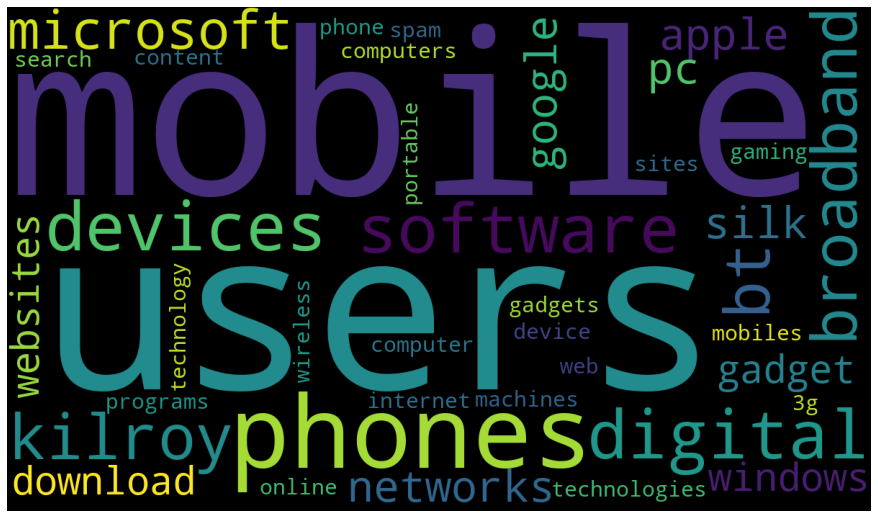

In [46]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 4: TECH**

In [47]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'actor': 0.9970902103043188,
 'actress': 0.9968779394869712,
 'festival': 0.9952623723015604,
 'seed': 0.994837663153765,
 'oscar': 0.9946126247543077,
 'theatre': 0.9945877647836306,
 'aviator': 0.9943336972403239,
 'robinson': 0.9942714489331752,
 'nintendo': 0.9938053694669664,
 'tournament': 0.9926755598364448,
 'slam': 0.9926752796609183,
 'oscars': 0.9904111741419728,
 'tennis': 0.9900524521895465,
 'starring': 0.9881092735604566,
 'ds': 0.9820764302873178,
 'federer': 0.9814603258284803,
 'gara': 0.981459747991344,
 'foxx': 0.9808209865446483,
 'hodgson': 0.9808199852181719,
 'henman': 0.9801582541231422,
 'lions': 0.9793561292404084,
 'comedy': 0.9783175507330157,
 'driscoll': 0.9772483798240189,
 'woodward': 0.9772481542689566,
 'actors': 0.9756150340581591,
 'vera': 0.9747475425307844,
 'wimbledon': 0.9747439086498938,
 'henson': 0.9738430190845231,
 'dallaglio': 0.9738428233945403,
 'drake': 0.9728990077144489,
 'nominees': 0.9728989814674783,
 'bafta': 0.971912435897568,
 

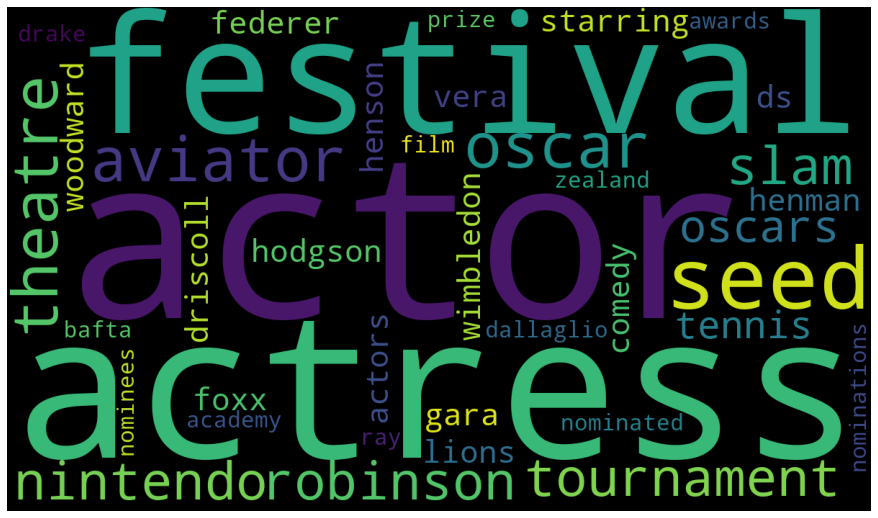

In [48]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 5: ENTERTAINMENT**

In [49]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict

{'chelsea': 0.9971058150356958,
 'ferguson': 0.9956926079156355,
 'gerrard': 0.9954145370612174,
 'arsenal': 0.9945563979369202,
 'glazer': 0.9939800265831792,
 'striker': 0.9937989852880517,
 'athletics': 0.9936131467711603,
 'mourinho': 0.993225559730286,
 'holmes': 0.9928165604846052,
 'greek': 0.9919203885647251,
 'kenteris': 0.99167858305675,
 'iaaf': 0.9914295234870697,
 'fa': 0.9909069476813233,
 'doping': 0.9906328369869821,
 'wenger': 0.9903488459959934,
 'athletes': 0.9891110350514231,
 'thanou': 0.9891109685448206,
 'parry': 0.9887728115305188,
 'barcelona': 0.9884222114757123,
 'rangers': 0.9884220178105896,
 'marathon': 0.9884220177411996,
 'athens': 0.9876477650904998,
 'radcliffe': 0.9872854524667073,
 'everton': 0.9864482328505911,
 'benitez': 0.9860030668643546,
 'album': 0.9850650666364424,
 'bellamy': 0.9845463235534544,
 'southampton': 0.9840155579996821,
 'rap': 0.9828768032759478,
 'souness': 0.9822637979252735,
 'olympic': 0.9739898117827704,
 'madrid': 0.9696736

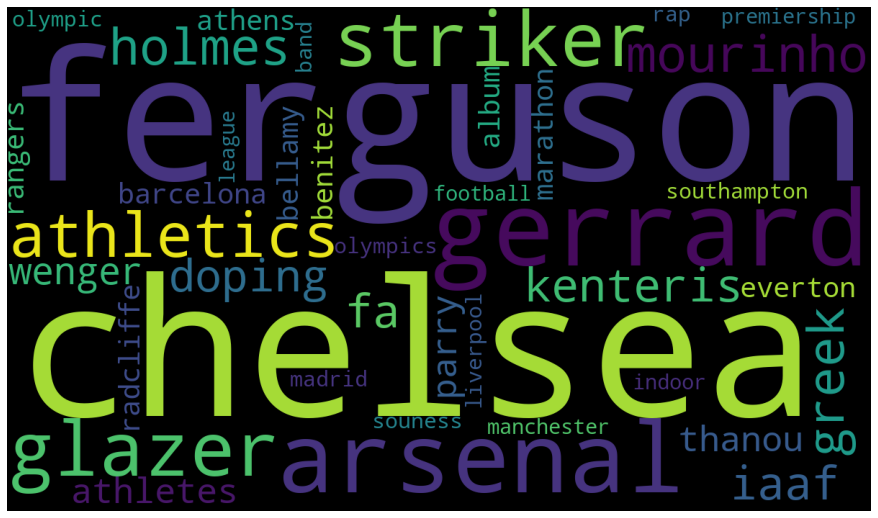

In [50]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **CONCLUSION:**